# 预测

In [85]:
%cd E:\My Projects\unet-pytorch-Buliiiing

e:\My Projects\unet-pytorch-Buliiiing


## 导入包

In [2]:
import time
import cv2
import numpy as np
from PIL import Image
from unet import Unet
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#-------------------------------------------------------------------------#
#   如果想要修改对应种类的颜色，到generate函数里修改self.colors即可
#-------------------------------------------------------------------------#
unet = Unet()
#-------------------------------------------------------------------------#
#   mode用于指定测试的模式：
#   'predict'表示单张图片预测
#   'video'表示视频检测
#   'fps'表示测试fps
#-------------------------------------------------------------------------#
mode = "predict"

logs/Epoch44-Total_Loss0.0483-Val_Loss0.0874.pth model loaded.


In [4]:
img_path = 'VOCdevkit/VOC2007/JPEGImages/38.jpg'
img = Image.open(img_path)

r_img,gray_img,seg_img = unet.detect_image(img)
r_img = np.array(r_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


=================预测结果=======================


Text(0.5, 1.0, 'Image seg_img')

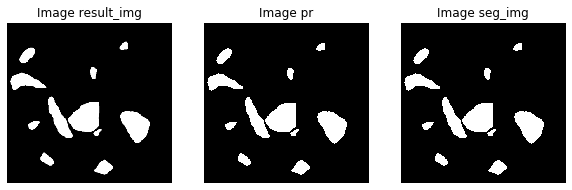

In [6]:

print("=================预测结果=======================")

plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(r_img)
plt.axis('off')
plt.title('Image result_img')

plt.subplot(1,3,2)
plt.imshow(gray_img,cmap="gray")
plt.axis('off')
plt.title('Image pr')

plt.subplot(1,3,3)
plt.imshow(seg_img)
plt.axis('off')
plt.title('Image seg_img')

gray_img : shape=(512,512) min=0  max=1  灰度图

seg_img : shape=(512,512,3) min=0 max=255  seg_img为每个种类的掩码给了颜色，这里类别为2，

In [7]:
from scipy.ndimage.measurements import label,find_objects

mask_lesion, num_predicted = label(gray_img)
print(mask_lesion)
locations = find_objects(mask_lesion)
print(locations)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[(slice(61, 86, None), slice(349, 376, None)), (slice(79, 128, None), slice(38, 87, None)), (slice(140, 177, None), slice(258, 279, None)), (slice(157, 211, None), slice(10, 122, None)), (slice(231, 360, None), slice(127, 204, None)), (slice(248, 341, None), slice(189, 287, None)), (slice(276, 376, None), slice(352, 444, None)), (slice(308, 334, None), slice(65, 101, None)), (slice(331, 352, None), slice(268, 294, None)), (slice(405, 445, None), slice(103, 146, None)), (slice(427, 473, None), slice(271, 328, None))]


In [8]:
label_arrays = []
for label_num in range(1, num_predicted+1):
    label_mask = np.where(mask_lesion == label_num, 1, 0)
    label_arrays.append(label_mask)

print('There are {} separate components / objects detected.'.format(num_predicted))

There are 11 separate components / objects detected.


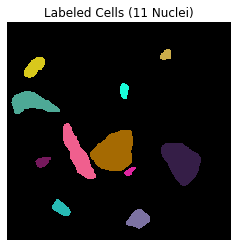

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a random colormap
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(mask_lesion > 0, mask_lesion, np.nan)
plt.imshow(gray_img, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('Labeled Cells ({} Nuclei)'.format(num_predicted))
plt.show()
plt.savefig('instance_seg.png')

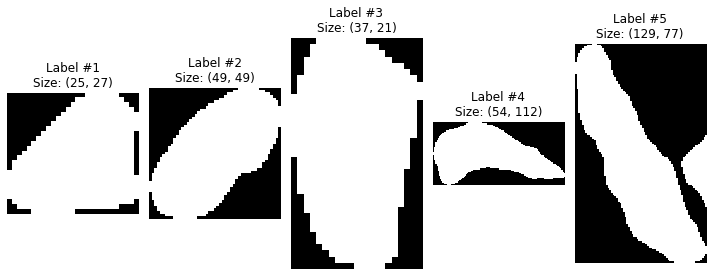

In [20]:
obj_num = len(locations)

fig, axes = plt.subplots(1,obj_num, figsize=(10,6))

for ii, obj_indices in enumerate(locations):
    cell = gray_img[obj_indices]
    axes[ii].imshow(cell, cmap='gray')
    axes[ii].axis('off')
    axes[ii].set_title('Label #{}\nSize: {}'.format(ii+1, cell.shape))

plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(12,4))

for ax in axes:
    ax.axis('off')
plt.tight_layout()

axes[0].imshow(seg_img[two_cell_indices], cmap='gray')
axes[0].set_title('Original object')
axes[1].imshow(gray_img[two_cell_indices], cmap='gray')
axes[1].set_title('Original mask')
axes[2].imshow(cell_mask_opened, cmap='gray')
axes[2].set_title('Opened mask')

axes[3].imshow(gray_img[two_cell_indices]*cell_mask_opened, cmap='gray')
axes[3].set_title('Opened object')


In [ ]:
from scipy import ndimage
# Get the object indices, and perform a binary opening procedure
two_cell_indices = find_objects(mask_lesion)[3]
cell_mask = gray_img[two_cell_indices]
cell_mask_opened = ndimage.binary_opening(cell_mask, iterations=8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1, 'Opened object')

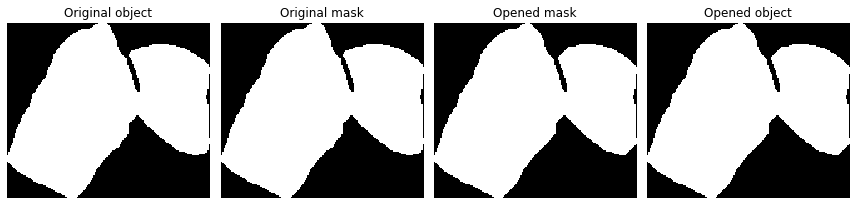

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(12,4))

for ax in axes:
    ax.axis('off')
plt.tight_layout()


axes[0].imshow(seg_img[two_cell_indices], cmap='gray')
axes[0].set_title('Original object')
axes[1].imshow(gray_img[two_cell_indices], cmap='gray')
axes[1].set_title('Original mask')
axes[2].imshow(cell_mask_opened, cmap='gray')
axes[2].set_title('Opened mask')

axes[3].imshow(gray_img[two_cell_indices]*cell_mask_opened, cmap='gray')
axes[3].set_title('Opened object')
